# Lambda School Data Science Unit 4 Sprint Challenge 4

## RNNs, CNNs, AutoML, and more...

In this sprint challenge, you'll explore some of the cutting edge of Data Science.

*Caution* - these approaches can be pretty heavy computationally. All problems were designed so that you should be able to achieve results within at most 5-10 minutes of runtime on Colab or a comparable environment. If something is running longer, doublecheck your approach!

## Part 1 - RNNs

Use an RNN to fit a simple classification model on tweets to distinguish from tweets from Austen Allred and tweets from Weird Al Yankovic.

Following is code to scrape the needed data (no API auth needed, uses [twitterscraper](https://github.com/taspinar/twitterscraper)):

In [1]:
!pip install twitterscraper

  Stored in directory: /Users/zarrina/Library/Caches/pip/wheels/45/50/9b/70128bca07e2bf8b5ed3f504002e9e74a6eaa5e756341b6931
  Stored in directory: /Users/zarrina/Library/Caches/pip/wheels/a0/b0/b2/4f80b9456b87abedbc0bf2d52235414c3467d8889be38dd472
Successfully built twitterscraper bs4


In [2]:
from twitterscraper import query_tweets

austen_tweets = query_tweets('from:austen', 1000)
len(austen_tweets)

INFO: queries: ['from:austen since:2006-03-21 until:2006-11-14', 'from:austen since:2006-11-14 until:2007-07-11', 'from:austen since:2007-07-11 until:2008-03-05', 'from:austen since:2008-03-05 until:2008-10-30', 'from:austen since:2008-10-30 until:2009-06-25', 'from:austen since:2009-06-25 until:2010-02-19', 'from:austen since:2010-02-19 until:2010-10-15', 'from:austen since:2010-10-15 until:2011-06-11', 'from:austen since:2011-06-11 until:2012-02-04', 'from:austen since:2012-02-04 until:2012-09-30', 'from:austen since:2012-09-30 until:2013-05-26', 'from:austen since:2013-05-26 until:2014-01-20', 'from:austen since:2014-01-20 until:2014-09-15', 'from:austen since:2014-09-15 until:2015-05-12', 'from:austen since:2015-05-12 until:2016-01-05', 'from:austen since:2016-01-05 until:2016-08-31', 'from:austen since:2016-08-31 until:2017-04-26', 'from:austen since:2017-04-26 until:2017-12-21', 'from:austen since:2017-12-21 until:2018-08-16', 'from:austen since:2018-08-16 until:2019-04-12']
INFO

181

In [3]:
austen_tweets[0].text

'I love love love working with great people.pic.twitter.com/fCKOm6Vl'

In [4]:
al_tweets = query_tweets('from:AlYankovic', 1000)
len(al_tweets)

INFO: queries: ['from:AlYankovic since:2006-03-21 until:2006-11-14', 'from:AlYankovic since:2006-11-14 until:2007-07-11', 'from:AlYankovic since:2007-07-11 until:2008-03-05', 'from:AlYankovic since:2008-03-05 until:2008-10-30', 'from:AlYankovic since:2008-10-30 until:2009-06-25', 'from:AlYankovic since:2009-06-25 until:2010-02-19', 'from:AlYankovic since:2010-02-19 until:2010-10-15', 'from:AlYankovic since:2010-10-15 until:2011-06-11', 'from:AlYankovic since:2011-06-11 until:2012-02-04', 'from:AlYankovic since:2012-02-04 until:2012-09-30', 'from:AlYankovic since:2012-09-30 until:2013-05-26', 'from:AlYankovic since:2013-05-26 until:2014-01-20', 'from:AlYankovic since:2014-01-20 until:2014-09-15', 'from:AlYankovic since:2014-09-15 until:2015-05-12', 'from:AlYankovic since:2015-05-12 until:2016-01-05', 'from:AlYankovic since:2016-01-05 until:2016-08-31', 'from:AlYankovic since:2016-08-31 until:2017-04-26', 'from:AlYankovic since:2017-04-26 until:2017-12-21', 'from:AlYankovic since:2017-12

960

In [5]:
al_tweets[0].text

'Another blast from the past: my heart-to-heart chat with Britney Spears http://bit.ly/bH8o0m'

In [6]:
len(austen_tweets + al_tweets)

1141

Your tasks:

- Encode the characters to a sequence of integers for the model
- Get the data into the appropriate shape/format, including labels and a train/test split
- Use Keras to fit a predictive model, classifying tweets as being from Austen versus Weird Al
- Report your overall score and accuracy

For reference, the [Keras IMDB sentiment classification example](https://github.com/keras-team/keras/blob/master/examples/imdb_lstm.py) will be useful, as well the RNN code we used in class.

*Note* - focus on getting a running model, not on maxing accuracy with extreme data size or epoch numbers. Only revisit and push accuracy if you get everything else done!

In [77]:
# TODO - your code!
from __future__ import print_function
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, Dropout
from keras.layers import LSTM
from keras.callbacks import EarlyStopping, ModelCheckpoint


In [133]:
def get_tweets_text(alist):
    all_tweets = []
    for tweet in alist:
        all_tweets.append(tweet.text)
    return all_tweets
austen_tweets_text = get_tweets_text(austen_tweets)
#austen_tweets_text

In [134]:
al_tweets_text = get_tweets_text(al_tweets)
#al_tweets_text

In [136]:
import pandas as pd
import numpy as np

df = pd.DataFrame()
df['tweets'] = austen_tweets_text
df['result'] = np.ones(df.shape[0])

df2 = pd.DataFrame()
df2['tweets'] = al_tweets_text
df2['result'] = np.zeros(df2.shape[0])

df_joint = pd.concat([df, df2])
#df_joint


In [29]:
df_joint.head()

,tweets,result
0,I love love love working with great people.pic...,1.0
1,Elon Musk is severely underrated,1.0
2,SpaceX 2002 vs 2017pic.twitter.com/dtzBID2Q3v,1.0
3,Yes. On the blockchain.,1.0
4,This is a publicly traded company with no reve...,1.0


In [32]:
from sklearn.utils import shuffle
df_joint = shuffle(df_joint)
df_joint.head()

,tweets,result
341,Does anybody know the expiration on whoop-ass?...,0.0
52,"Wheeee! Look at me! I'm goin' 1,000 miles an...",0.0
63,In time and resources spent it's closer to two...,1.0
167,"Wow… well, THAT was fast. My @LadyGaga parody...",0.0
171,I remember when I was trying to make my way in...,1.0


In [139]:
tweets = ''
for item in np.array(df_joint.tweets):
     tweets += '\n\n' + item
#tweets        

In [140]:
import numpy as np
chars = sorted(list(set(tweets)))

#one hot encode
char_to_int = dict((c, i) for i, c in enumerate(chars))
int_to_char = dict((i, c) for i, c in enumerate(chars))


In [141]:
austen_enc = []
for tweet in austen_tweets:
    austen_enc.append([char_to_int[char] for char in tweet.text])
    
al_enc = []
for tweet in al_tweets:
    al_enc.append([char_to_int[char] for char in tweet.text])

In [142]:
df_joint.head()

,tweets,result
0,I love love love working with great people.pic...,1.0
1,Elon Musk is severely underrated,1.0
2,SpaceX 2002 vs 2017pic.twitter.com/dtzBID2Q3v,1.0
3,Yes. On the blockchain.,1.0
4,This is a publicly traded company with no reve...,1.0


In [150]:
df['encoded'] = [enc for enc in austen_enc]
df['result'] = np.ones(df.shape[0])
df2['encoded'] = [enc for enc in al_enc]
df2['result'] = np.zeros(df2.shape[0])

In [151]:
df_joint = pd.concat([df, df2])
df_joint.head()

,tweets,result,encoded
0,I love love love working with great people.pic...,1.0,"[39, 1, 69, 72, 79, 62, 1, 69, 72, 79, 62, 1, ..."
1,Elon Musk is severely underrated,1.0,"[35, 69, 72, 71, 1, 43, 78, 76, 68, 1, 66, 76,..."
2,SpaceX 2002 vs 2017pic.twitter.com/dtzBID2Q3v,1.0,"[49, 73, 58, 60, 62, 54, 1, 19, 17, 17, 19, 1,..."
3,Yes. On the blockchain.,1.0,"[55, 62, 76, 15, 1, 45, 71, 1, 77, 65, 62, 1, ..."
4,This is a publicly traded company with no reve...,1.0,"[50, 65, 66, 76, 1, 66, 76, 1, 58, 1, 73, 78, ..."


In [153]:
from sklearn.utils import shuffle
df_joint = shuffle(df_joint)
df_joint.head()

,tweets,result,encoded
608,I stand corrected - a mammogram is NOT a messa...,0.0,"[39, 1, 76, 77, 58, 71, 61, 1, 60, 72, 75, 75,..."
405,Pocket dial with @thomaslennon http://instagra...,0.0,"[46, 72, 60, 68, 62, 77, 1, 61, 66, 58, 69, 1,..."
8,Mick! http://bit.ly/bjCawL \nAnd Keith! http...,0.0,"[43, 66, 60, 68, 2, 1, 1, 65, 77, 77, 73, 27, ..."
428,Regram from @hardwick. \n\nTonight on @midnigh...,0.0,"[48, 62, 64, 75, 58, 70, 1, 63, 75, 72, 70, 1,..."
295,Once they let me be the TV weatherman for a da...,0.0,"[45, 71, 60, 62, 1, 77, 65, 62, 82, 1, 69, 62,..."


In [156]:
from sklearn.model_selection import train_test_split
max_tweet_length = 280
X = sequence.pad_sequences(df_joint['encoded'], maxlen=max_tweet_length)
y = df.result

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y)
                                                                                                    

In [157]:
print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')


912 train sequences
229 test sequences


In [166]:
max_features = 280
# keras predictive model
model = Sequential()
model.add(Embedding(max_features, 30, input_length=max_tweet_length))
model.add(LSTM(50))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [169]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15, batch_size=100)

Train on 912 samples, validate on 229 samples
Epoch 1/15
912/912 [==============================] - 5s 5ms/step - loss: 0.3708 - acc: 0.8498 - val_loss: 0.3638 - val_acc: 0.8472
Epoch 2/15
912/912 [==============================] - 5s 5ms/step - loss: 0.3525 - acc: 0.8520 - val_loss: 0.3222 - val_acc: 0.8559
Epoch 3/15
912/912 [==============================] - 5s 5ms/step - loss: 0.3214 - acc: 0.8651 - val_loss: 0.3165 - val_acc: 0.8821
Epoch 4/15
912/912 [==============================] - 5s 6ms/step - loss: 0.3123 - acc: 0.8827 - val_loss: 0.3012 - val_acc: 0.8734
Epoch 5/15
912/912 [==============================] - 4s 5ms/step - loss: 0.3067 - acc: 0.8882 - val_loss: 0.2897 - val_acc: 0.9127
Epoch 6/15
912/912 [==============================] - 5s 5ms/step - loss: 0.2756 - acc: 0.9035 - val_loss: 0.2638 - val_acc: 0.9170
Epoch 7/15
912/912 [==============================] - 5s 5ms/step - loss: 0.2719 - acc: 0.8936 - val_loss: 0.2662 - val_acc: 0.9083
Epoch 8/15
912/912 [==========

In [170]:
# test accuracy
scores = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy: %.2f%%" % (scores[1]*100))


Test Accuracy: 91.70%


Conclusion - RNN runs, and gives pretty decent improvement over a naive "It's Al!" model. To *really* improve the model, more playing with parameters, and just getting more data (particularly Austen tweets), would help. Also - RNN may well not be the best approach here, but it is at least a valid one.

## Part 2- CNNs

Time to play "find the frog!" Use Keras and ResNet50 to detect which of the following images contain frogs:

In [85]:
!pip install google_images_download

In [86]:
from google_images_download import google_images_download

response = google_images_download.googleimagesdownload()
arguments = {"keywords": "animal pond", "limit": 5, "print_urls": True}
absolute_image_paths = response.download(arguments)


Item no.: 1 --> Item name = animal pond
Evaluating...
Starting Download...
Image URL: https://www.enchantedlearning.com/pgifs/Pondanimals.GIF
Completed Image ====> 1. pondanimals.gif
Image URL: https://i.ytimg.com/vi/NCbu0TND9vE/hqdefault.jpg
Completed Image ====> 2. hqdefault.jpg
Image URL: https://pklifescience.com/staticfiles/articles/images/PKLS4116_inline.png
Completed Image ====> 3. pkls4116_inline.png
Image URL: https://pixnio.com/free-images/fauna-animals/reptiles-and-amphibians/alligators-and-crocodiles-pictures/alligator-animal-on-pond.jpg
Completed Image ====> 4. alligator-animal-on-pond.jpg
Image URL: https://www.nwf.org/-/media/NEW-WEBSITE/Programs/Garden-for-Wildlife/amphibian_bronze-frog_Julia-Bartosh_400x267.ashx
Completed Image ====> 5. amphibian_bronze-frog_julia-bartosh_400x267.ash

Errors: 0



At time of writing at least a few do, but since the Internet changes - it is possible your 5 won't. You can easily verify yourself, and (once you have working code) increase the number of images you pull to be more sure of getting a frog. Your goal is to validly run ResNet50 on the input images - don't worry about tuning or improving the model.

*Hint* - ResNet 50 doesn't just return "frog". The three labels it has for frogs are: `bullfrog, tree frog, tailed frog`

*Stretch goal* - also check for fish.

In [94]:
# TODO - your code!
from PIL import Image, ImageOps
from keras.applications.resnet50 import ResNet50,preprocess_input, decode_predictions
from keras.preprocessing import image
import matplotlib.pyplot as plt

In [89]:
image_path_list = absolute_image_paths['animal pond']
image_path_list

['/Users/zarrina/Desktop/DS-Unit-4-Sprint-4-Deep-Learning/sc/downloads/animal pond/1. pondanimals.gif',
 '/Users/zarrina/Desktop/DS-Unit-4-Sprint-4-Deep-Learning/sc/downloads/animal pond/2. hqdefault.jpg',
 '/Users/zarrina/Desktop/DS-Unit-4-Sprint-4-Deep-Learning/sc/downloads/animal pond/3. pkls4116_inline.png',
 '/Users/zarrina/Desktop/DS-Unit-4-Sprint-4-Deep-Learning/sc/downloads/animal pond/4. alligator-animal-on-pond.jpg',
 '/Users/zarrina/Desktop/DS-Unit-4-Sprint-4-Deep-Learning/sc/downloads/animal pond/5. amphibian_bronze-frog_julia-bartosh_400x267.ash']

In [92]:
def resize_image(filename, new_width=256, new_height=256):
  pil_image = Image.open(filename)
  pil_image = ImageOps.fit(pil_image, (new_width, new_height), Image.ANTIALIAS)
  pil_image_rgb = pil_image.convert('RGB')
  pil_image_rgb.save(filename, format='JPEG', quality=90)

for path in image_path_list:
  resize_image(path, 224, 224)

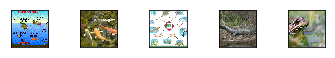

In [95]:
# Display images
def show_images(image_path_list):
  plt.figure();
  for i, image_path in enumerate(image_path_list):
    plt.subplot(5,5, i+1)
    plt.imshow(np.asarray(Image.open(image_path)))
    plt.grid(False)
    plt.yticks([])
    plt.xticks([])
  plt.show()

show_images(image_path_list)

In [96]:
def process_img_path(img_path):
    return image.load_img(img_path, target_size=(224, 224))

def interpret(img):
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    model = ResNet50(weights='imagenet')
    features = model.predict(x)
    results = decode_predictions(features, top=3)[0]
    return results
  
all_predictions = []
for i, image_path in enumerate(image_path_list):
    results = interpret(process_img_path(image_path))
    all_predictions.append(results)
    print(results)
    print(len(all_predictions))

[('n06359193', 'web_site', 0.89183867), ('n04404412', 'television', 0.0854772), ('n04152593', 'screen', 0.006043829)]
1
[('n01443537', 'goldfish', 0.577143), ('n02536864', 'coho', 0.31938618), ('n01630670', 'common_newt', 0.020655122)]
2
[('n04243546', 'slot', 0.957449), ('n04476259', 'tray', 0.014238194), ('n03908618', 'pencil_box', 0.007384071)]
3
[('n01698640', 'American_alligator', 0.5908738), ('n01737021', 'water_snake', 0.13598225), ('n01697457', 'African_crocodile', 0.07479113)]
4
[('n01641577', 'bullfrog', 0.66036457), ('n01644900', 'tailed_frog', 0.31086266), ('n01630670', 'common_newt', 0.012726638)]
5


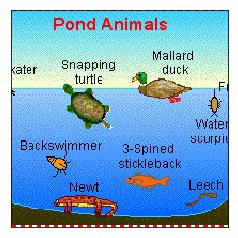


Found!
goldfish: 0.577


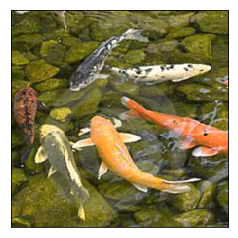

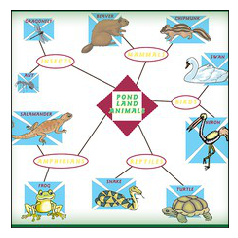

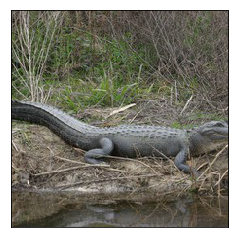


Found!
bullfrog: 0.660
Found!
tailed_frog: 0.311


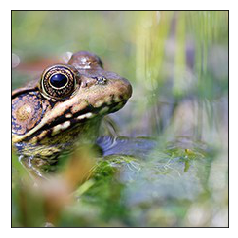

In [177]:
for path, prediction in zip(image_path_list, all_predictions):
  
  for _, thing, prob in prediction:
    if 'frog' in thing or 'fish' in thing:
      print('Found!')  
      print(f'{thing}: {prob:.3f}')
#     else:
      # print('No Frog or Fish Found')
  plt.subplot()
  plt.imshow(np.asarray(Image.open(path)))
  plt.grid(False)
  plt.yticks([])
  plt.xticks([])
  plt.show()
  print()


## Part 3 - AutoML

Use [TPOT](https://github.com/EpistasisLab/tpot) to fit a predictive model for the King County housing data, with `price` as the target output variable.

In [102]:
!pip install tpot

    100% |████████████████████████████████| 81kB 3.5MB/s ta 0:00:01
    100% |████████████████████████████████| 942kB 6.7MB/s ta 0:00:011
  Stored in directory: /Users/zarrina/Library/Caches/pip/wheels/22/ea/bf/dc7c8a2262025a0ab5da9ef02282c198be88902791ca0c6658
  Stored in directory: /Users/zarrina/Library/Caches/pip/wheels/3c/85/2b/2580190404636bfc63e8de3dff629c03bb795021e1983a6cc7
Successfully built deap stopit


In [120]:
import wget
url =  'https://raw.githubusercontent.com/ryanleeallred/datasets/master/kc_house_data.csv'
kc_house_data.csv = wget.download(url)

In [107]:
!head kc_house_data.csv

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
"7129300520","20141013T000000",221900,3,1,1180,5650,"1",0,0,3,7,1180,0,1955,0,"98178",47.5112,-122.257,1340,5650
"6414100192","20141209T000000",538000,3,2.25,2570,7242,"2",0,0,3,7,2170,400,1951,1991,"98125",47.721,-122.319,1690,7639
"5631500400","20150225T000000",180000,2,1,770,10000,"1",0,0,3,6,770,0,1933,0,"98028",47.7379,-122.233,2720,8062
"2487200875","20141209T000000",604000,4,3,1960,5000,"1",0,0,5,7,1050,910,1965,0,"98136",47.5208,-122.393,1360,5000
"1954400510","20150218T000000",510000,3,2,1680,8080,"1",0,0,3,8,1680,0,1987,0,"98074",47.6168,-122.045,1800,7503
"7237550310","20140512T000000",1.225e+006,4,4.5,5420,101930,"1",0,0,3,11,3890,1530,2001,0,"98053",47.6561,-122.005,4760,101930
"1321400060","20140627T000000",257500,3,2.25,1715,6819,"2",0,0,3,7,1715,0,1995,0,"98003",47.3097,-122.327,2238,6819
"2

As with previous questions, your goal is to run TPOT and successfully run and report error at the end.  Also, in the interest of time, feel free to choose small `generation=1` and `population_size=10` parameters so your pipeline runs efficiently and you are able to iterate and test.

*Hint* - you'll have to drop and/or type coerce at least a few variables to get things working. It's fine to err on the side of dropping to get things running, as long as you still get a valid model with reasonable predictive power.

In [108]:
# TODO - your code!
import pandas as pd
from tpot import TPOTRegressor

house_data = pd.read_csv('kc_house_data.csv')
house_data.head()

/Users/zarrina/anaconda3/lib/python3.7/site-packages/deap/tools/_hypervolume/pyhv.py:33: ImportWarning: Falling back to the python version of hypervolume module. Expect this to be very slow.
  "module. Expect this to be very slow.", ImportWarning)
/Users/zarrina/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/Users/zarrina/anaconda3/lib/python3.7/importlib/_bootstrap_external.py:434: ImportWarning: Not importing directory /Users/zarrina/anaconda3/lib/python3.7/site-packages/google: missing __init__
  _warnings.warn(msg.format(portions[0]), ImportWarning)
/Users/zarrina/anaconda3/lib/python3.7/importlib/_bootstrap_external.py:434: ImportWarning: Not importing directory /Users/zarrina/anaconda3/lib/python3.7/site-packages/mpl_toolkits: missing __init__
  _warnings.warn(msg.format(portions[0]), ImportWarning)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [109]:
house_data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [113]:
for col in house_data.columns:
    house_data[col] = pd.to_numeric(house_data[col], errors='coerce')

In [114]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             0 non-null float64
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(6), int64(15)
memory usage: 3.5 MB


In [115]:
X_house = house_data.drop('price', axis=1).values
X_h_train, X_h_test, y_h_train, y_h_test = train_test_split(
    X_house, house_data['price'].values, train_size=0.75, test_size=0.25)

In [116]:
%%time

tpot = TPOTRegressor(generations=5, population_size=20, verbosity=2)
tpot.fit(X_h_train, y_h_train)
print(tpot.score(X_h_test, y_h_test))

Imputing missing values in feature set


Generation 1 - Current best internal CV score: -20224237233.25972
Generation 2 - Current best internal CV score: -20224237233.25972
Generation 3 - Current best internal CV score: -20224237233.25972
Generation 4 - Current best internal CV score: -18476886247.88376
Generation 5 - Current best internal CV score: -18476886247.88376

Best pipeline: DecisionTreeRegressor(RandomForestRegressor(input_matrix, bootstrap=False, max_features=0.3, min_samples_leaf=2, min_samples_split=2, n_estimators=100), max_depth=8, min_samples_leaf=16, min_samples_split=4)
Imputing missing values in feature set
-14471035399.599533
CPU times: user 25min 51s, sys: 15.2 s, total: 26min 7s
Wall time: 25min 59s


In [118]:
print('Test Score %.2f' % tpot.score(X_h_test, y_h_test))

Imputing missing values in feature set
Test Score -14471035399.60


## Part 4 - More...

Answer the following questions, with a target audience of a fellow Data Scientist:

- What do you consider your strongest area, as a Data Scientist?
- What area of Data Science would you most like to learn more about, and why?
- Where do you think Data Science will be in 5 years?

A few sentences per answer is fine - only elaborate if time allows.

Thank you for your hard work, and congratulations! You've learned a lot, and should proudly call yourself a Data Scientist.

1. As a Data Scientist, I consider my strongest areas to be variety of my skills, such as 
knowledge of full-stack development, JavaScript, SQL, in addition to skills acquired while 
at Lambda School. Also, background in business administration and economics helps me to 
understand business related problems and communicate them into 
data-related and data-solvabe problems.
2. Well, I have no real world experience, so it's tough to say right now, but I'm interested 
in NLP and would like to learn more about it. My thoughts now are more emotional, I just like 
it and it still seems like a magic for me. Also, throughout my previous work experiences, even as a 
developer, many times, I had to use my other languages knowledge to communicate with coworkers.
So, working with text transformations is natural for me:)
3. It's a tough question. If tomorrow a new Einstein reveals a new math theory related 
to areas applied to Data Science, everything can change dramatically. Even if not on such a deep
level, I think a more effective alternative to backpropagation will be found by that time. 
I believe, every company will use data science and it will be more a kind of routine procedure.
I think Auto_ML will be improved as well and we will use it much more.




